##### Name : Vakeesan.K
##### Index. No: 190643G

##### 1)

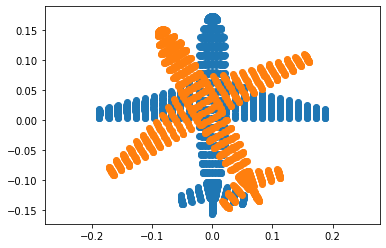

In [11]:
from plyfile import PlyData, PlyElement #open3d is the standarad
import matplotlib.pyplot as plt
import numpy as np

pcd=PlyData.read(r'C:\Python39\cv\exercices\lec 7\airplane.ply')
assert pcd is not None

points =np.concatenate((pcd['vertex']['x'].reshape(1,-1),pcd['vertex']['y'].reshape(1,-1),pcd['vertex']['z'].reshape(1,-1)),axis=0)
points = points - np.mean(points, axis=1).reshape(3,1)

ones =np.ones((1,points.shape[1]))
X = np.concatenate((points,ones),axis=0)
R = np.array([[1,0,0],[0,1,0],[0,0,1]])
K = np.array([[1,0,0],[0,1,0],[0,0,1]])
t = np.array([[0],[0],[-4000]])

P1=K@np.concatenate((R,t),axis=1)
theta = np.pi/6.
R = np.array([[np.cos(theta),-1*np.sin(theta),0],[np.sin(theta),np.cos(theta),0],[0,0,1]])
K = np.array([[1,0,0],[0,1,0],[0,0,1]])
t = np.array([[0],[0],[-4000]])

P2=K@np.concatenate((R,t),axis=1)


X1=P1 @ X
X2=P2 @X
X1 =X1/X1[2,:]
X2 =X2/X2[2,:]

fig,ax=plt.subplots(1,1,sharex=True,sharey=True)
ax.scatter(X1[0,:],X1[1,:])
ax.scatter(X2[0,:],X2[1,:])
ax.axis('equal')
plt.show()


Text(0.5, 0, 'x')

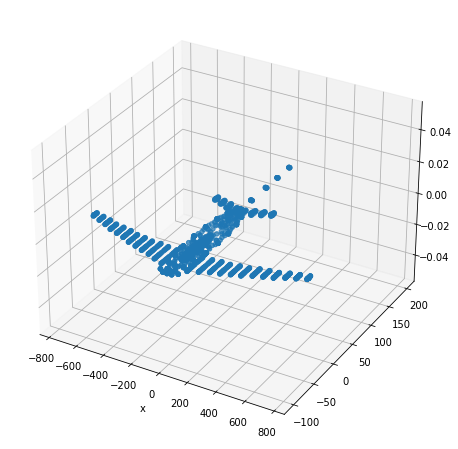

In [12]:
fig =plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter (points[0,:],points[2,:])
ax.set_xlabel('x')


##### 3)

Item 1 , area in pixels = 59143
Item 1 , area in mm^2 = 2318.642172
Item 2 , area in pixels = 59211
Item 2 , area in mm^2 = 2321.3080440000003


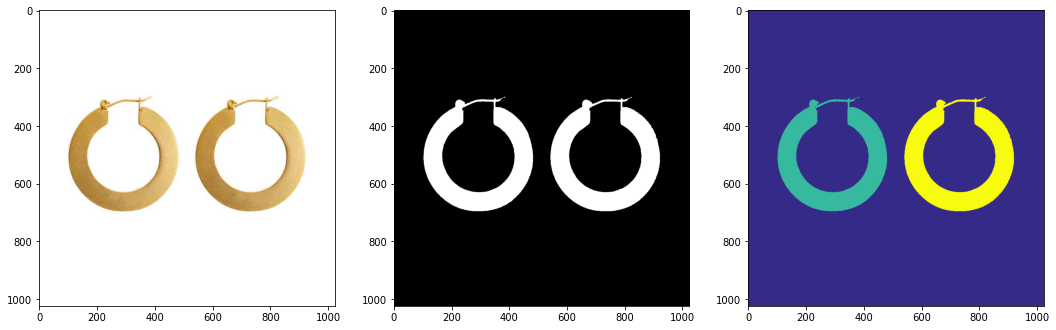

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
im = cv.imread(r'C:\Python39\cv\exercices\lec 7\earrings.jpg',cv.IMREAD_COLOR)
assert im is not None

hsv=cv.cvtColor(im,cv.COLOR_BGR2HSV)
th, bw=cv.threshold(hsv[:,:,1],0,255,cv.THRESH_BINARY + cv.THRESH_OTSU)


# closing operation
w = 5
kernel = np.ones((w,w), np.uint8)
opened = cv.morphologyEx(bw,cv.MORPH_CLOSE,kernel)

retval, labels, stats, centroids = cv.connectedComponentsWithStats(bw)
colormapped = cv.applyColorMap((labels/np.amax(labels)*255).astype('uint8'),cv.COLORMAP_PARULA)

z = 720
f  = 8
for i,s in enumerate(stats):
    if i !=0:
        print('Item',i,', area in pixels =',s[4])
        print('Item',i,', area in mm^2 =',s[4]*(2.2e-3)**2*(z*z)/(f*f))

fig,ax=plt.subplots(1,3,figsize=(18,6))
ax[0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(opened,cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(colormapped,cv.COLOR_BGR2RGB))
plt.show()


##### 4)

(0, 0, 0, 0)


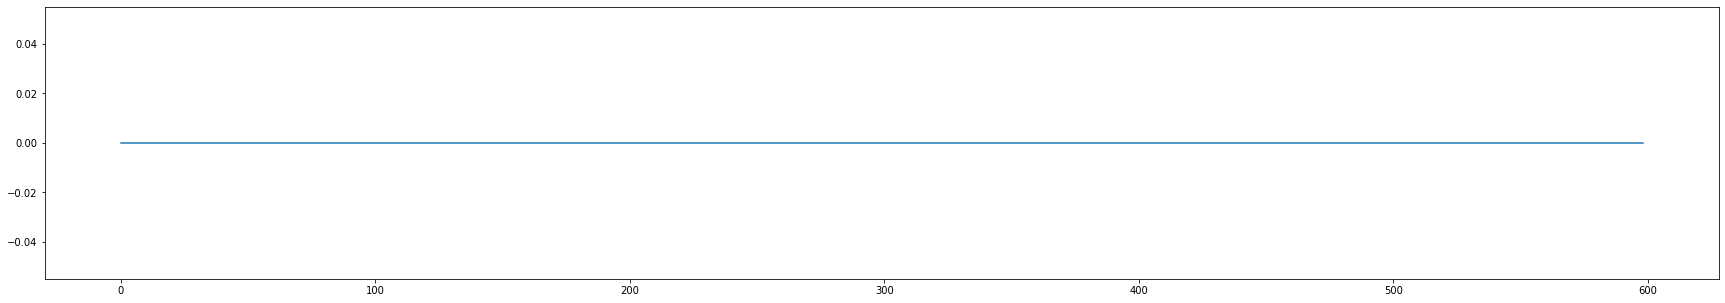

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread(r'C:\Python39\cv\exercices\lec 7\allenkeys.jpg',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None

canny = cv.Canny( im, 50 , 150)

#Copy edges to the images that wi l l display the r e sul t s in BGR
canny_color = cv.cvtColor ( canny , cv.COLOR_GRAY2BGR)
lines = cv.HoughLines ( canny , 1 , np.pi / 180 , 170 , None , 0 , 0)
if lines is not None :
    for i in range (0 , len ( lines ) ) :
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = ( int ( x0 + 1000*(-b ) ) , int ( y0 + 1000*(a ) ) )
        pt2 = ( int ( x0 - 1000*(-b ) ) , int ( y0 - 1000*(a ) ) )
        cv .line (canny_color , pt1 , pt2 , (0 ,0 ,255) , 1 , cv.LINE_AA)

cv.namedWindow( ' Image ' , cv .WINDOW_AUTOSIZE)
cv.imshow( ' Image ' , im)
cv.waitKey( 0 )
cv.imshow( ' Image ' , canny )
cv.waitKey( 0 )
cv.imshow( ' Image ' , canny_color )
r = cv.selectROI(' Image ' , canny_color , showCrosshair = True , fromCenter = False )
cv.waitKey ( 0 )
print ( r )
x0 , y0 = int ( r[0] + r[2]/2),int(r[1]+ r[3]/2)
m = b / a # Gradient
m = np.tan(np.median ( lines[ : , 0 ,1] ) )
c = y0 = m*x0 # Intercept

cv.line ( canny_color , (0 ,int( c )) , (im.shape[0] ,int (m*im.shape [ 0 ] + c ) ) , (0 ,255 ,0) , 2 , cv.LINE_AA)

cv.imshow(' Image ', canny_color )
cv.waitKey ( 0 )
cv.destroyAllWindows ( )

dy = 1
y_sub_pixel = np . arange (0 , im.shape[0] - 1 , dy )
f_sub_pixel = np . zeros_like ( y_sub_pixel )
f_sub_pixel_nn = np . zeros_like ( y_sub_pixel )


#for i , y in enumerate ( y_sub_pixel ) :
# Your code hear to generate the pixe l values along the line
fig , ax = plt.subplots ( figsize =(30 ,5) )
ax . plot ( f_sub_pixel_nn )
# Your code hear to compute the widths . Keep in mind of the angle .